##**Thông tin**


1.   Họ tên: Trần Huỳnh Kỳ Anh
2.   MSSV: 19521216
3.   Ngày thực hiện: 09/11/2021
4.   Nội dung: 




#**Clone dữ liệu**

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train,10)


x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)


#**Cài đặt mạng CNN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Input,MaxPooling2D,Flatten,AveragePooling2D,Conv2D
def get_model(input_dim):
  model = Sequential()
  model.add(Conv2D(8,(3,3),input_shape = input_dim,padding = 'same',activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same'))
  model.add(Conv2D(8,(3,3),padding = 'same',activation = 'relu'))
  model.add(Conv2D(8,(3,3),padding = 'same',activation = 'relu'))
  model.add(Conv2D(8,(3,3),strides=(2,2),padding = 'same',activation = 'relu'))
  model.add(Conv2D(16,(3,3),padding = 'same',activation = 'relu'))
  model.add(Conv2D(16,(3,3),padding = 'same',activation = 'relu'))
  model.add(AveragePooling2D(pool_size=(2, 2),strides=(2, 2), padding='same'))
  model.add(Flatten())
  model.add(Dense(units=400, activation='relu',use_bias=True))
  model.add(Dense(units=10, activation='sigmoid',use_bias=True))
  
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
model_cnn = get_model((28,28,1))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 16)          1168      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 16)         

In [ ]:
model_cnn.fit(x_train,y_train,epochs=50,batch_size=128)

Epoch 1/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1197 - accuracy: 0.7760
Epoch 2/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0236 - accuracy: 0.9640
Epoch 3/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0161 - accuracy: 0.9745
Epoch 4/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0128 - accuracy: 0.9804
Epoch 5/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0105 - accuracy: 0.9839
Epoch 6/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0094 - accuracy: 0.9856
Epoch 7/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0081 - accuracy: 0.9876
Epoch 8/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0071 - accuracy: 0.9888
Epoch 9/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0063 - accuracy: 0.9906
Epoch 10/50
469/469 [==============================] - 4s 10ms/step - loss: 0.0058 - accura

#**Kết quả**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

pre = model_cnn.predict(x_test)


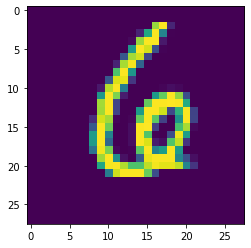

Predict:  6
True value: 6


In [ ]:
index = 123
plt.imshow(x_test[index][:,:,0])
plt.show()
print("Predict: ", np.argmax(pre[index]))
print("True value:", y_test[index])